In [36]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df = pd.read_csv('coding_round_data.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [43]:
# This dataset does not have any nan values
name_list = []
nan_list = []
for col in df.columns:
    if not df[col].isnull().values.any():
        name_list.append(col)
    else:
        nan_list.append(col)   
        
new_df = df[name_list]
nan_df = df[nan_list]

In [44]:
# Pop target
target = df.pop('Revenue')

In [45]:
# separate categorical column and numerical column
# cat_cols = df.select_dtypes("object").columns
num_cols = df.select_dtypes("number").columns

num_df = df[num_cols]
cat_df = df.loc[:, ~df.columns.isin(num_df)]


In [46]:
cat_df.head()

,Month,VisitorType,Weekend
0,Feb,Returning_Visitor,False
1,Feb,Returning_Visitor,False
2,Feb,Returning_Visitor,False
3,Feb,Returning_Visitor,False
4,Feb,Returning_Visitor,True


In [47]:
#summarize categorical variables
cat_df.describe()

,Month,VisitorType,Weekend
count,12330,12330,12330
unique,10,3,2
top,May,Returning_Visitor,False
freq,3364,10551,9462


In [48]:
#print counts of each categorical variable
for col in cat_df:
    print(cat_df[col].value_counts(dropna=False),'\n')

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64 

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64 

False    9462
True     2868
Name: Weekend, dtype: int64 



In [49]:
# create dummy variables
month_dummy = pd.get_dummies(cat_df['Month'])
visitor_dummy = pd.get_dummies(cat_df['VisitorType'])
weekend_dummy = pd.get_dummies(cat_df['Weekend'])
# cat_df.drop(['x3','x60','x65'],axis = 1, inplace = True)

# cat_df = pd.concat([num_df,month_dummy,visitor_dummy,weekend_dummy],axis = 1)

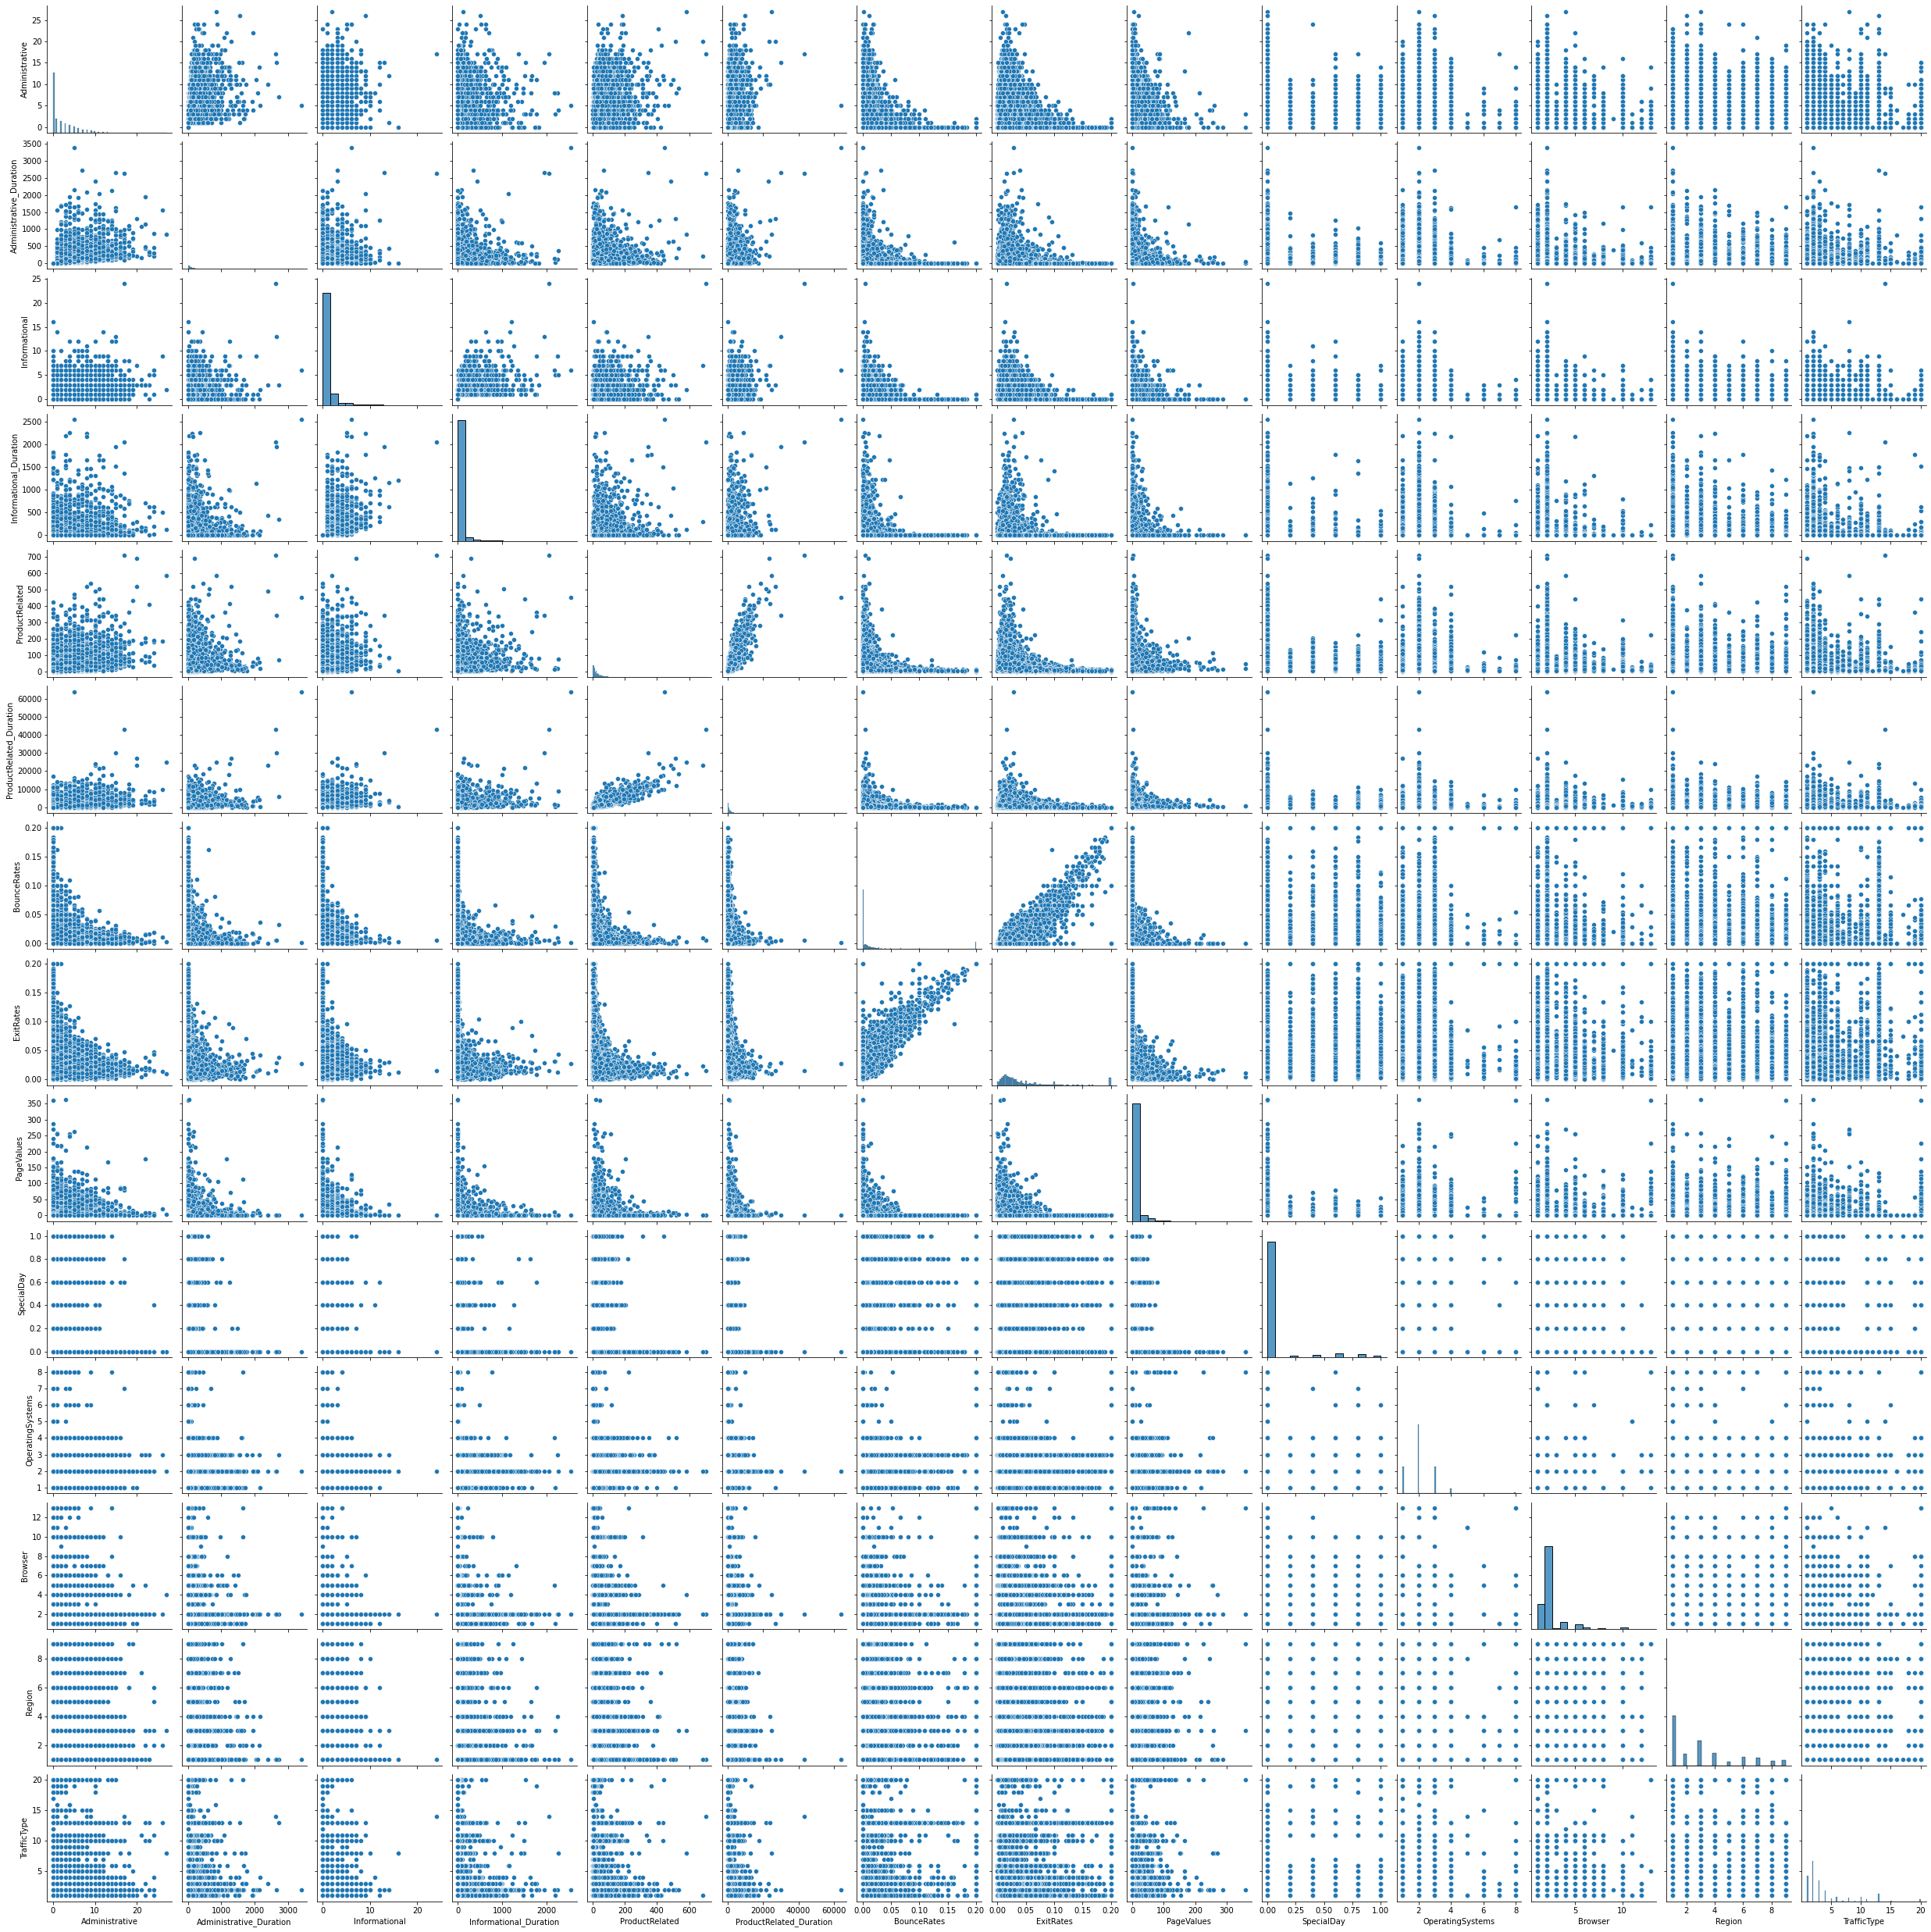

In [53]:
sns.pairplot(num_df)